Assignment: predicting house prices:

Now, it's your turn to design your first regression model. In this module, you'll be using a version of the "House Prices" dataset from Kaggle that we've ported to a Postgres database. This dataset consists of 79 variables describing many aspects of residential homes in Ames, Iowa. Using this data, your task will be to predict the prices of the houses. You can find the descriptions of the variables here: House Prices

To complete this assignment, create a Jupyter notebook containing your solutions to the following tasks:

Load the dataset from the Thinkful PostgreSQL database. You can look at the example above for inspiration on how to generate the database engine URL. You'll need the following values:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

Please follow the example above and call engine.dispose() when you no longer need to make db queries. You need to be in the habit of responsibly managing database connections, and the database only supports a limited number of connections.

Investigate the data, and do any necessary data cleaning.

Explore the data and find some variables that you think would be useful in predicting house prices.

Build your initial model using these features and estimate the parameters using OLS.

In [1]:
# Import some packages:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Connect to the data base:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format( postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from houseprices', con=engine)
engine.dispose()

In [3]:
# Look at the dataset:
df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [4]:
# Look at the number of unique values in each column:
df.nunique()

id               1460
mssubclass         15
mszoning            5
lotfrontage       110
lotarea          1073
street              2
alley               2
lotshape            4
landcontour         4
utilities           2
lotconfig           5
landslope           3
neighborhood       25
condition1          9
condition2          8
bldgtype            5
housestyle          8
overallqual        10
overallcond         9
yearbuilt         112
yearremodadd       61
roofstyle           6
roofmatl            8
exterior1st        15
exterior2nd        16
masvnrtype          4
masvnrarea        327
exterqual           4
extercond           5
foundation          6
                 ... 
bedroomabvgr        8
kitchenabvgr        4
kitchenqual         4
totrmsabvgrd       12
functional          7
fireplaces          4
fireplacequ         5
garagetype          6
garageyrblt        97
garagefinish        3
garagecars          5
garagearea        441
garagequal          5
garagecond          5
paveddrive

In [5]:
# Look at the number of missing value in each column:
df.isnull().sum().sort_values(ascending=False)

poolqc           1453
miscfeature      1406
alley            1369
fence            1179
fireplacequ       690
lotfrontage       259
garagecond         81
garagetype         81
garageyrblt        81
garagefinish       81
garagequal         81
bsmtexposure       38
bsmtfintype2       38
bsmtfintype1       37
bsmtcond           37
bsmtqual           37
masvnrarea          8
masvnrtype          8
electrical          1
utilities           0
yearremodadd        0
mssubclass          0
foundation          0
extercond           0
exterqual           0
exterior2nd         0
exterior1st         0
roofmatl            0
roofstyle           0
yearbuilt           0
                 ... 
garagearea          0
paveddrive          0
wooddecksf          0
openporchsf         0
threessnporch       0
bsmtunfsf           0
screenporch         0
poolarea            0
miscval             0
mosold              0
yrsold              0
saletype            0
functional          0
totrmsabvgrd        0
kitchenqua

In [6]:
# Look at the type of each column:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

As you know, in this dataset, saleprice is target variable and we want to predict the prices of the houses.

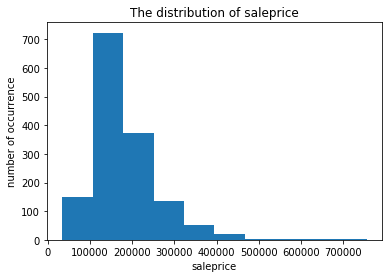

In [7]:
# Look at the distribution of target variable(saleprice):
plt.hist(df.saleprice)
plt.title("The distribution of saleprice")
plt.xlabel("saleprice")
plt.ylabel("number of occurrence")
plt.show()

as you can see here, the distribution of target variable is not normal and it is right skewed. Also, the majority of the observations have low saleprice values and few of the observations have high saleprice values. This makes the distribution of the target variable clustered at the left-most part of the histogram. 

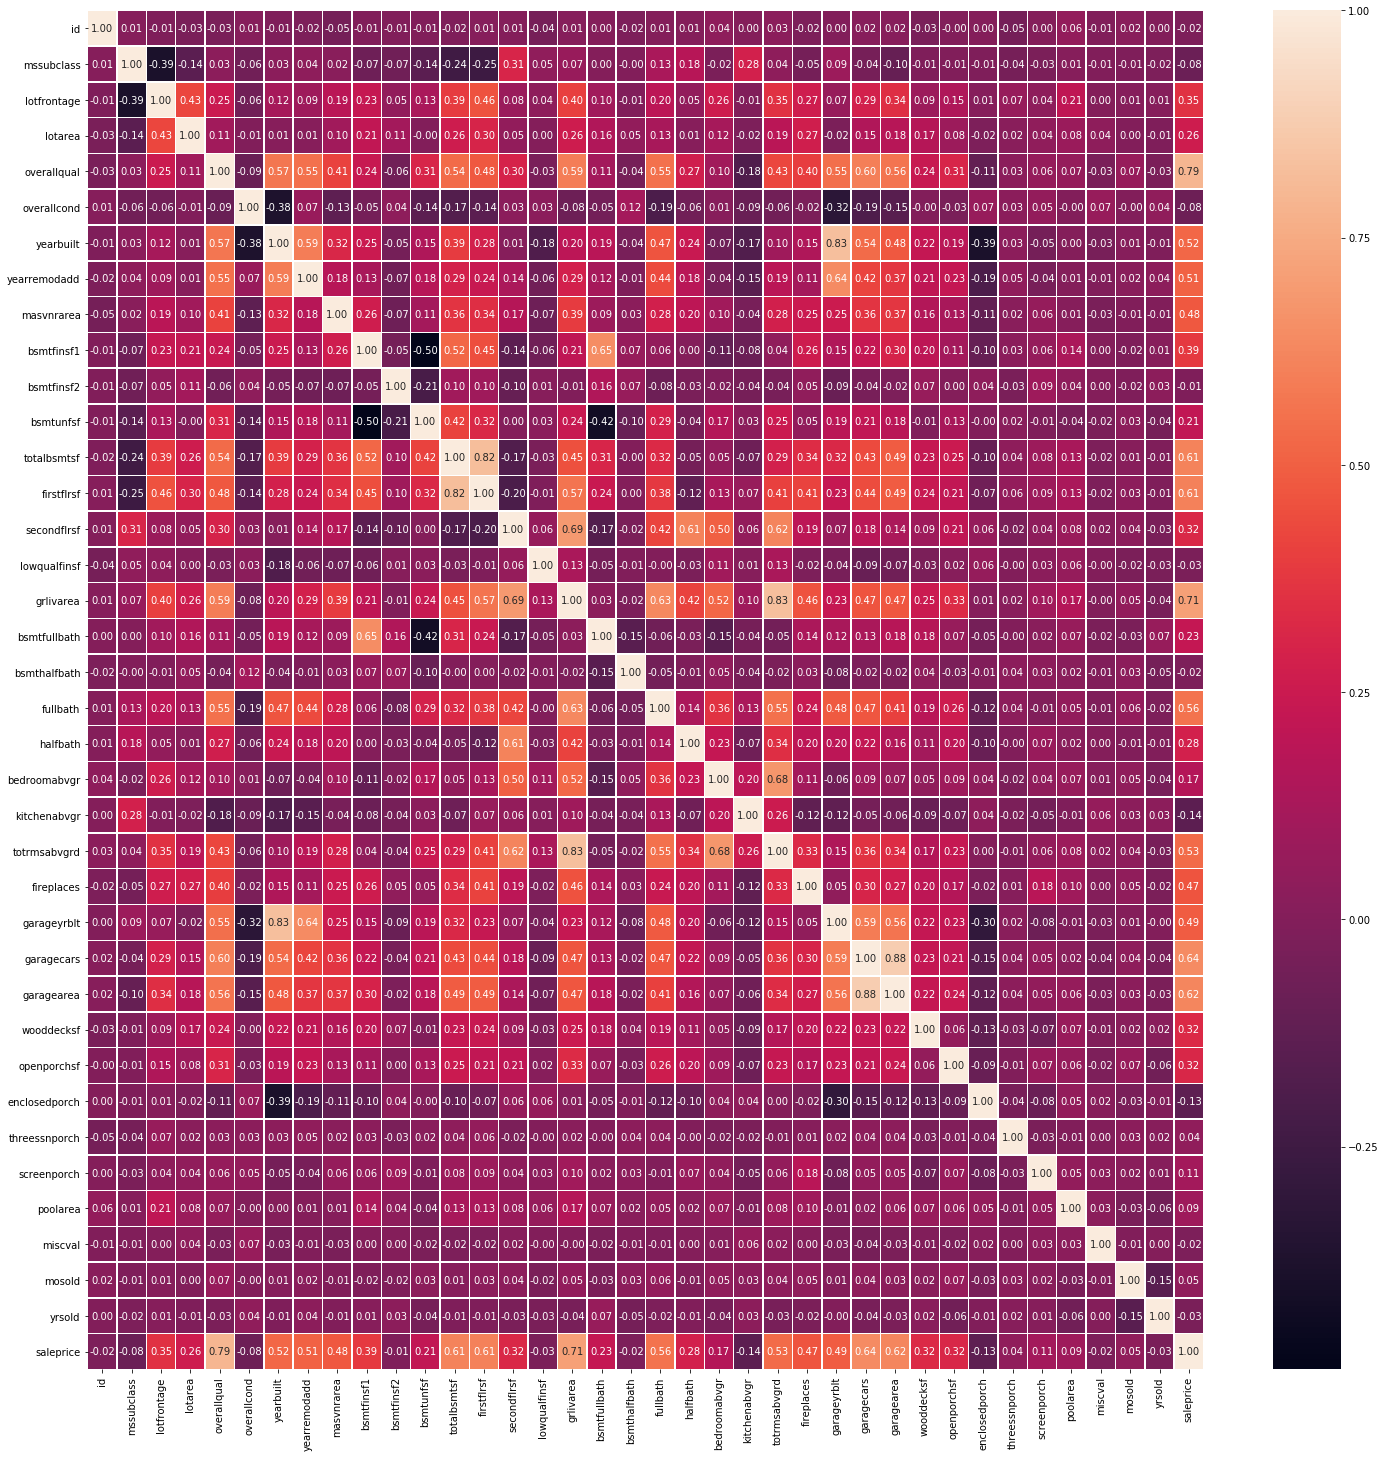

In [8]:
# Look at the correlationship between target variable and countinus columns:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f')

As shown here, saleprice has strong correlation with overallqual and grlivarea.

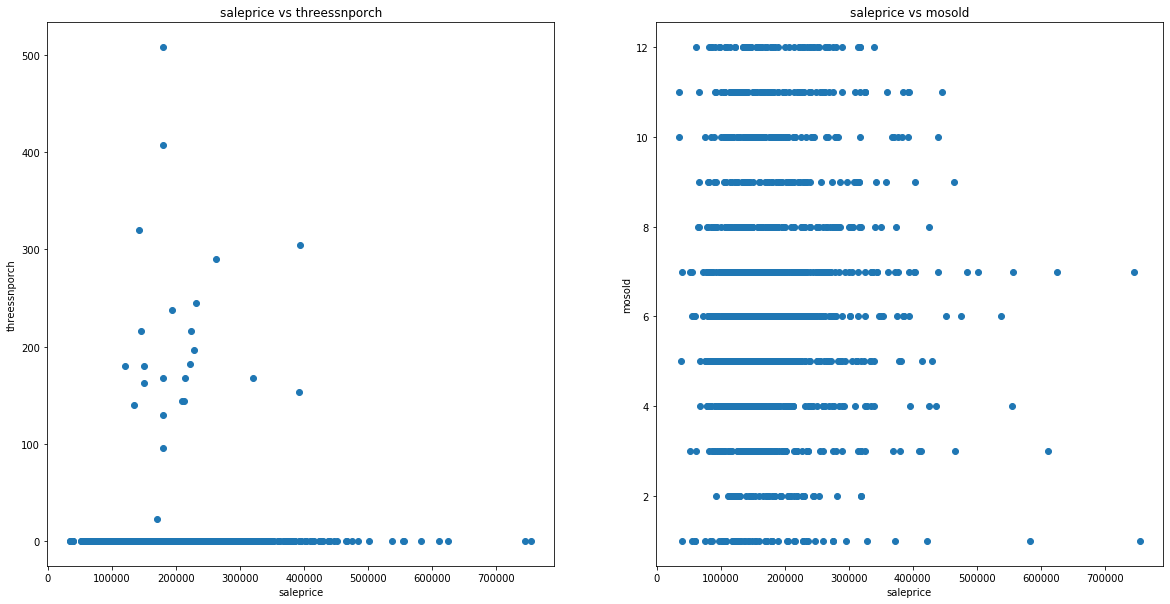

In [9]:
# Look at the distribution of target variable with two variables with weak correlation:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.scatter(df['saleprice'], df['threessnporch'])
plt.xlabel('saleprice')
plt.ylabel('threessnporch')
plt.title('saleprice vs threessnporch')

plt.subplot(1,2,2)
plt.scatter(df['saleprice'], df['mosold'])
plt.xlabel('saleprice')
plt.ylabel('mosold')
plt.title('saleprice vs mosold')

plt.show()

Now, look at the distribution between categorical columns and target variable.

In [10]:
# Calculate number of non numeric columns:
nonnumeric_columns=df.select_dtypes('object').columns
print(nonnumeric_columns)
print('number of nonnumeric columns is {}'.format(len(nonnumeric_columns)))

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')
number of nonnumeric columns is 43


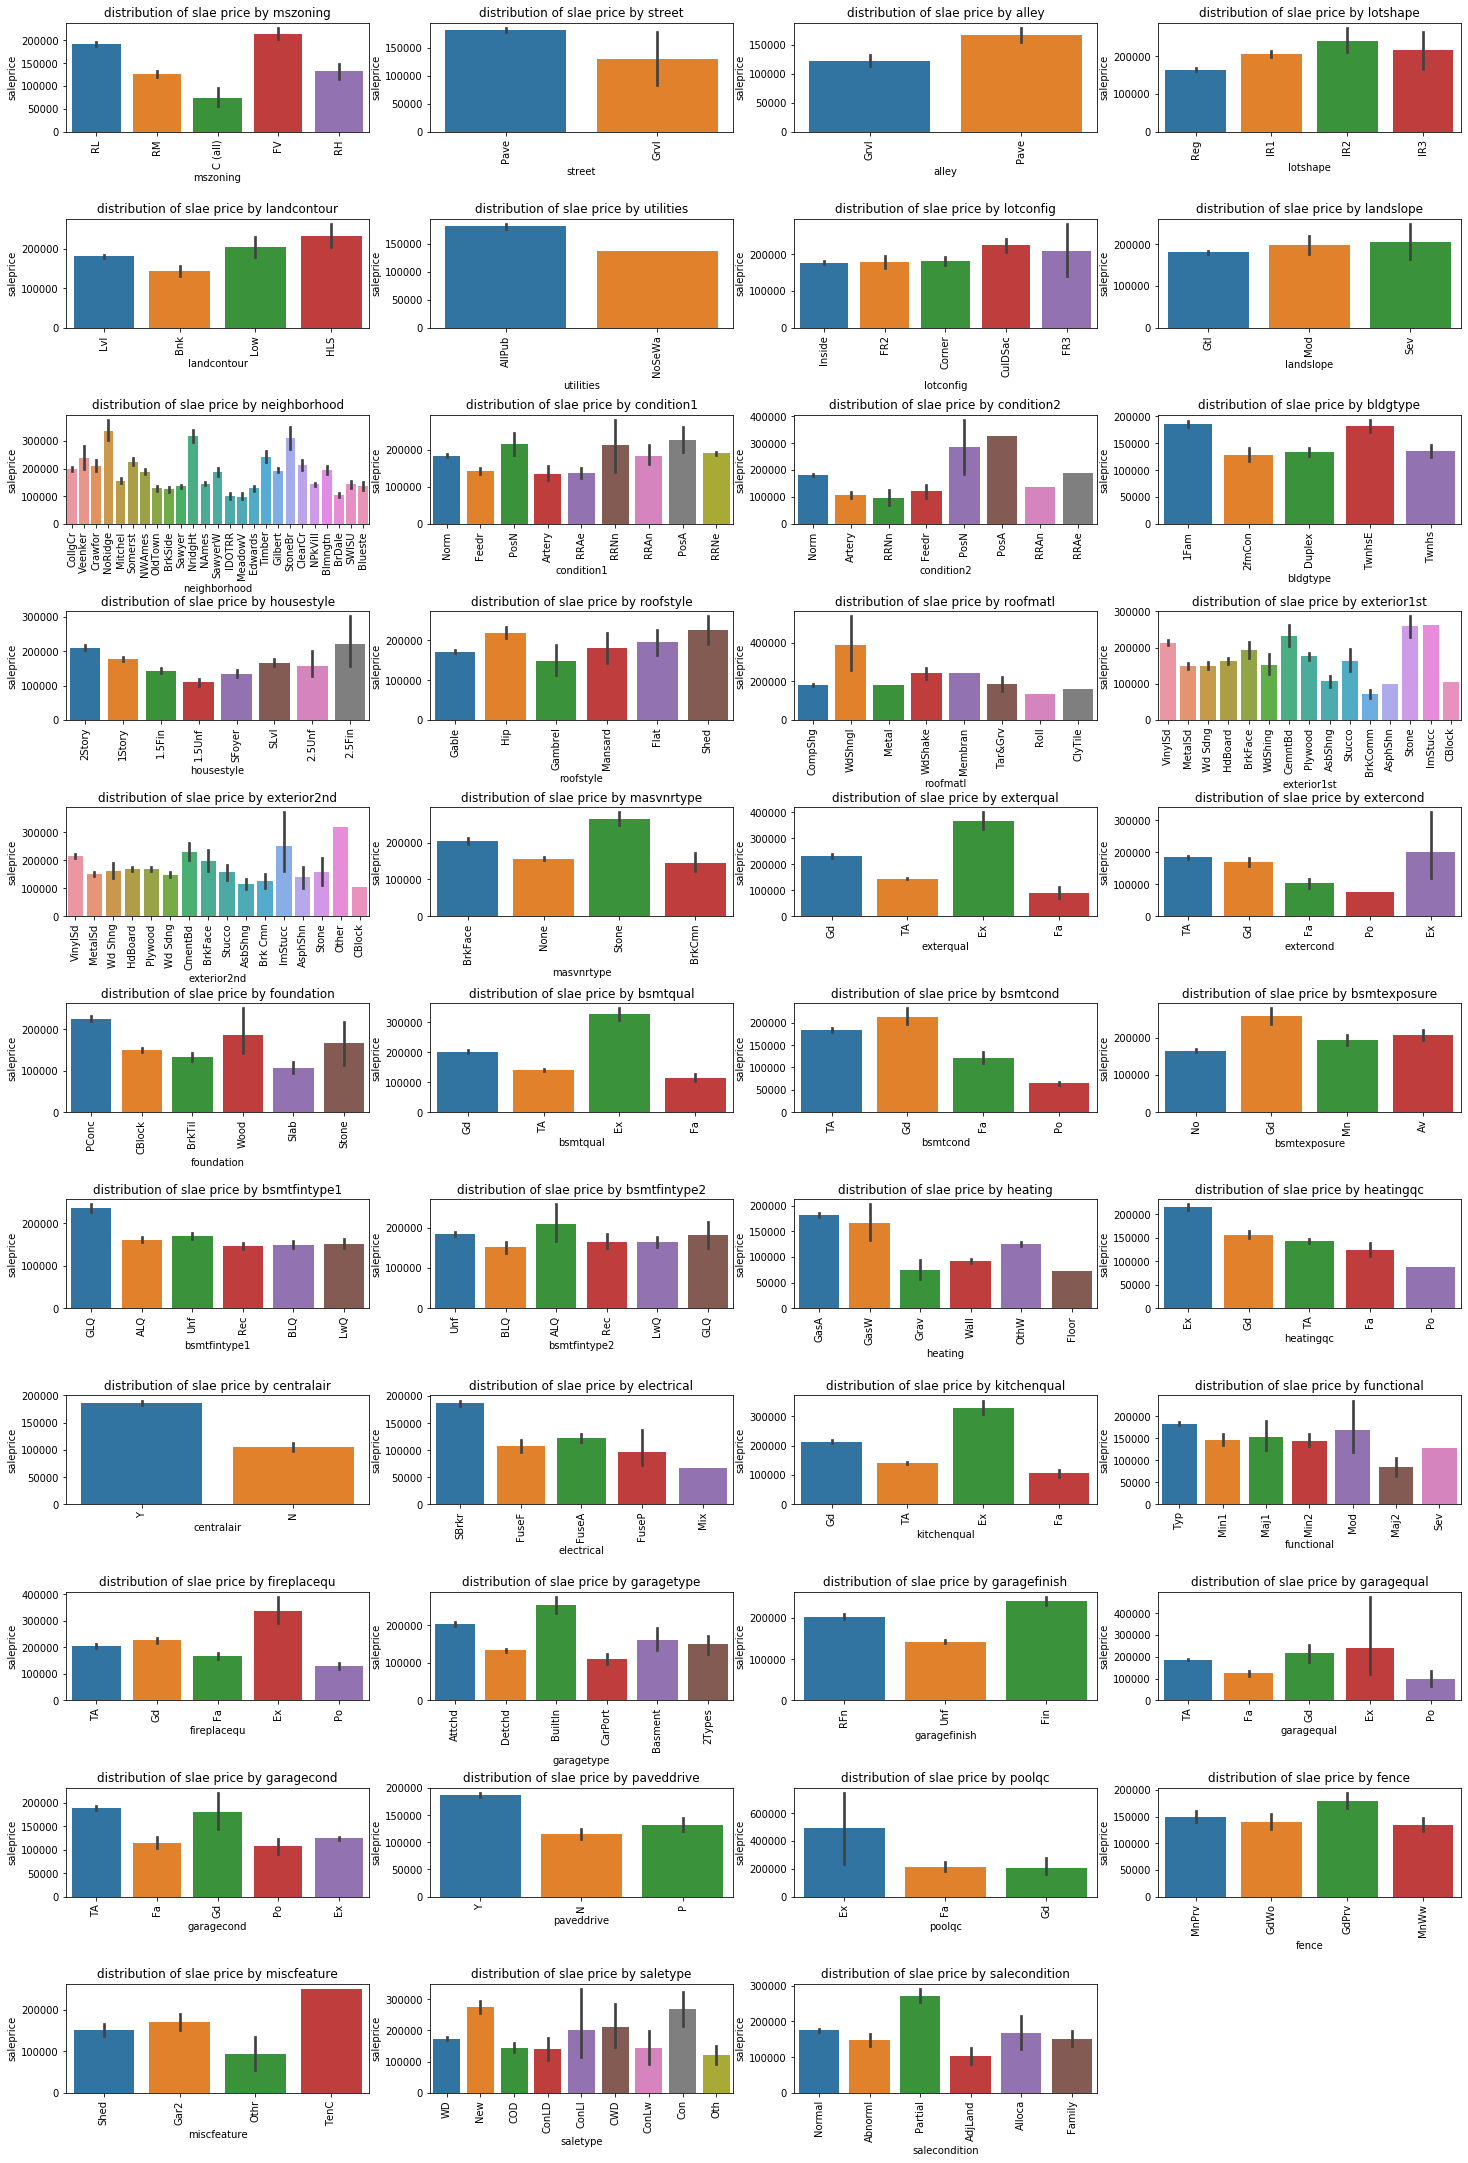

In [11]:
# Look at the distribution of target variable with nonnumeric columns:
plt.figure(figsize=(25,50))
for i,column in enumerate(nonnumeric_columns):
    plt.subplot(11, 4, i+1)
    sns.barplot(df[column], df['saleprice'])
    plt.title(f'distribution of slae price by {column}')
    plt.xticks(rotation=90)
plt.subplots_adjust(hspace = 0.8, top = 0.7)
plt.show()

In [12]:
# ???? for linear regression is better to use more continuous variable or categorical???
# ???? how to choose categorical (convert to number) and continuous variable for using in the model?????
# ??? it is better to choose more feature or not ???

Fisrt, I choose two categorical variables. The categorical variables are strings and we need to convert them to numerical values.

In [13]:
# I convert two categorical variables to numbers and concat to dataset:
df = pd.concat([df,pd.get_dummies(df.mszoning, prefix="mszoning", drop_first=True)], axis=1)
df = pd.concat([df,pd.get_dummies(df.utilities, prefix="utilities", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(df.mszoning, prefix="mszoning", drop_first=True).columns) + list(pd.get_dummies(df.utilities, prefix="utilities", drop_first=True).columns)


In [14]:
df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,mosold,yrsold,saletype,salecondition,saleprice,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,utilities_NoSeWa
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,2,2008,WD,Normal,208500,0,0,1,0,0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,5,2007,WD,Normal,181500,0,0,1,0,0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,9,2008,WD,Normal,223500,0,0,1,0,0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,2,2006,WD,Abnorml,140000,0,0,1,0,0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,12,2008,WD,Normal,250000,0,0,1,0,0


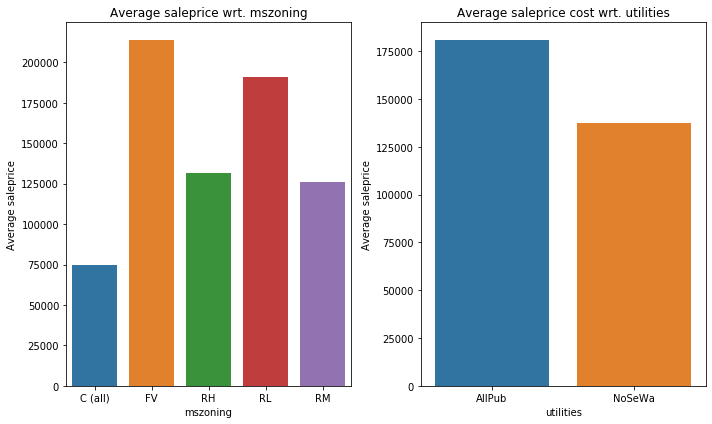

In [15]:
# Look at the distribution of average price and two categorical variables:

plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.barplot(df.groupby("mszoning")["saleprice"].mean().index, df.groupby("mszoning")["saleprice"].mean())
plt.title("Average saleprice wrt. mszoning")
plt.ylabel("Average saleprice")
plt.xlabel("mszoning")

plt.subplot(1,2,2)
sns.barplot(df.groupby("utilities")["saleprice"].mean().index, df.groupby("utilities")["saleprice"].mean())
plt.title("Average saleprice cost wrt. utilities")
plt.ylabel("Average saleprice")
plt.xlabel("utilities")

plt.tight_layout()
plt.show()

Now modeling the saleprice houses with linear regression.I choose two (???? I didnt know how many????) weak correlationship variables between target variable and continuse variables; also, I choose two categorical variables (????? i didnt know how to choose and how many???) then using all of them to model.  

saleprice:y = 𝛽0+𝛽1 threessnporch + 𝛽2 mosold + 𝛽3 mszoning + 𝛽4 utilities + 𝜖

In [16]:
# Now we build a simple linear regression model and estimate it using OLS:

# Y is the target variable:
Y = df['saleprice']
# X is the feature set which includes:overallqual, grlivarea, mszoning, utilities:
X = df[['threessnporch','mosold'] + dummy_column_names]

# We create a LinearRegression model with statsmodels' sm linear_model module.

# We need to manually add a constant in statsmodels' sm
X = sm.add_constant(X)

# fit method estimates the coefficients using OLS
results = sm.OLS(Y,  X).fit()

# Inspect the results.
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     25.98
Date:                Wed, 04 Dec 2019   Prob (F-statistic):           1.13e-33
Time:                        01:15:21   Log-Likelihood:                -18458.
No. Observations:                1460   AIC:                         3.693e+04
Df Residuals:                    1452   BIC:                         3.697e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6.348e+04   2.44e+04      2.602      0.009    1.56e+04    1.11e+05
threessnporch       84.8014     67.158      1.263      0.207     -46.936     216.539
mosold            1435.3758    729.741      1.967      0.049       3.916    2866.835
mszoning_FV       1.415e+05   2.55e+04      5.545      0.000    9.15e+04    1.92e+05
mszoning_RH       5.732e+04   3.03e+04      1.894      0.058   -2045.410    1.17e+05
mszoning_RL       1.181e+05   2.39e+04      4.950      0.000    7.13e+04    1.65e+05
mszoning_RM       5.387e+04   2.43e+04      2.217      0.027    6195.085    1.02e+05
utilities_NoSeWa -4.556e+04   7.52e+04     -0.606      0.545   -1.93e+05    1.02e+05
==============================================================================
Omnibus:                      692.221   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5041.452
Skew:                           2.081   Prob(JB):                         0.00
Kurtosis:                      11.096   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Since we get the parameters  with statsmodels' sm by using OLS, we can write our estimated model:

saleprice:y = 63480 + 84.8014 threessnporch + 1435.3758 mosold + 370790 mszoning - 45560 utilities 